# Simple_Linear Regression

In [1]:
# importing the required packages

import pandas as pd

import numpy as np

In [2]:
df = pd.read_fwf("brain_body.txt")  # reading the dataset

In [3]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [4]:
df.shape

(62, 2)

# Preprocessing the Data

In [5]:
df.isnull().sum()  # checking the missing the missing values

Brain    0
Body     0
dtype: int64

In [6]:
df.dtypes  # checking whether the data in the rght data type

Brain    float64
Body     float64
dtype: object

In [7]:
df.describe()  # checking for outliers

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [8]:
# Treating the Outliers

iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)  # (q3 - q1)

upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)  # (q3 + (1.5 * iqr))

lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)  # (q1 - (1.5 * iqr))

upper_threshold , lower_threshold

(119.60625, -70.80375000000001)

In [9]:
df.Brain = df.Brain.clip(-70 , 119)  # outlier treated by clip function

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(62, 2)

# EDA

#  Is there any releation between fts and target - Yes
#  Is there any Linear releation between fts and target - Yes
#  NO Transformation is required

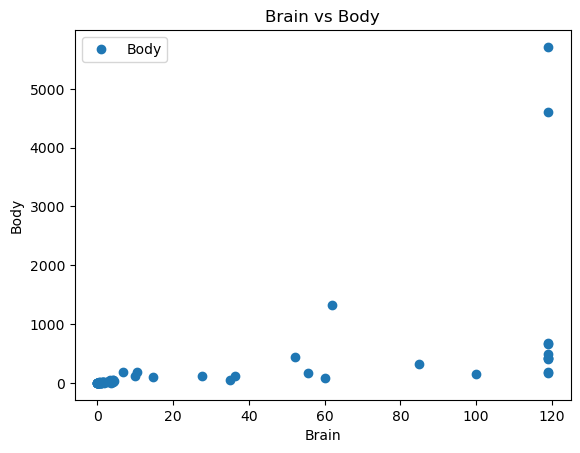

In [12]:
import matplotlib.pyplot as plt  # importing required package for EDA

df.plot(x = 'Brain' , y = 'Body' , style = 'o')

plt.title('Brain vs Body')

plt.xlabel('Brain')

plt.ylabel('Body')

plt.show()

In [13]:
df.corr()  # there is a good linear releation between feature and the target variable

,Brain,Body
Brain,1.00000,0.51026
Body,0.51026,1.00000


# Hence There is No Categorical Data No Need To Encode The Dataset

In [14]:
# Train and Split the Data

X = df.loc[ : ,['Brain']].values  # selecting all rows and selecting all columns except target variable

y = df.loc[ : , 'Body'].values  # selecting all rows and select the target variable 

In [15]:
from sklearn.model_selection import train_test_split  # importing the required package for train and split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3)

X_train.shape , X_test.shape

((43, 1), (19, 1))

# Normalising / Scaling The Data

In [16]:
from sklearn.preprocessing import StandardScaler  # importing the required package

scaler = StandardScaler()  # initialize the scaler 

scaler.fit(X_train)  # By fitting the X_train we are finding the muu and sigma

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  # only fit the X_train not X_test

# Modeling

In [18]:
# Model for simple linear regression

# y = (m * x) + c

In [19]:
from sklearn.linear_model import LinearRegression  # importing the required package

regressor = LinearRegression()  # initialize the model

regressor.fit(X_train , y_train)  # by fitting the data we learning the GD and Get the best values of m and c

LinearRegression()

In [20]:
regressor.intercept_  # c

238.43999999999994

In [21]:
regressor.coef_  # slope - m

array([386.61119683])

In [22]:
regressor.predict([[3]])

array([1398.27359049])

In [23]:
y_pred = regressor.predict(X_test)

y_pred

array([ 7.51034882e+02,  1.05166932e+03,  3.03964433e+01,  8.64465726e+00,
        1.19162674e+01,  3.20685522e+02,  1.05166932e+03,  3.41841391e-01,
        8.83667723e+02,  9.27338787e+01,  1.11944466e-01,  1.05166932e+03,
       -3.47849384e-01,  5.09842991e-01,  3.68367960e-01,  3.03964433e+01,
        3.08925410e+02,  2.86280054e+01,  3.12806622e+01])

In [24]:
df_ = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})

df_

,Actual,Predicted
0,325.0,751.034882
1,490.0,1051.669322
2,10.8,30.396443
3,5.5,8.644657
4,17.5,11.916267
5,119.5,320.685522
6,5712.0,1051.669322
7,4.0,0.341841
8,157.0,883.667723
9,179.5,92.733879


In [25]:
regressor.predict([[3.5]])

array([1591.5791889])

# Evaluation Metric

In [26]:
from sklearn import metrics  # importing the required package

print('R2_Score:' , metrics.r2_score(y_test , y_pred))

R2_Score: 0.21919262020285857


In [27]:
regressor.score(X_test , y_test)  # anothere method for r2 score

0.21919262020285857

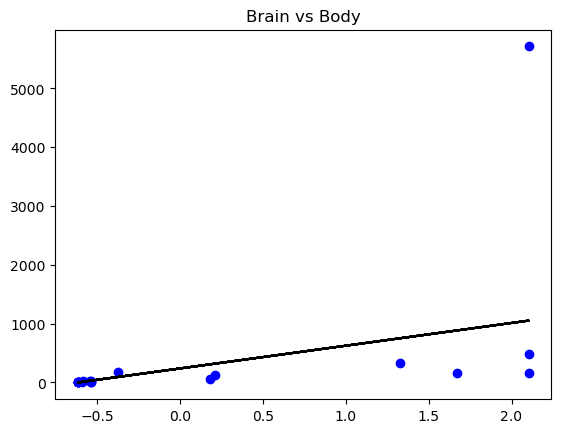

In [28]:
y_pred = regressor.predict(X_test)

plt.title('Brain vs Body')

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')
  
plt.show()

# Loss Function

In [29]:
from sklearn.metrics import mean_squared_error , mean_absolute_error # importing the required package

#MSE = mean_squared_error(y_true = y_test , y_pred = y_pred)

MAE = mean_absolute_error(y_true = y_test , y_pred = y_pred)

In [30]:
#MSE

In [31]:
MAE

414.4470935123507